# Dataset preview

In [2]:
# Modelo Salario RH
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Carregar dataset
df_sal = pd.read_csv('./datasets/dataset_salario.csv')

In [4]:
df_sal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   tempo_na_empresa  1000 non-null   int64  
 1   nivel_na_empresa  1000 non-null   int64  
 2   salario_em_reais  1000 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 23.6 KB


In [5]:
# Copiar df para EDA
df_sal_eda = df_sal.copy()

In [6]:
# Copiar df para bucketing
df_sal_bkt = df_sal.copy()

# EDA

## Overview

In [7]:
df_sal_eda.head(10)

,tempo_na_empresa,nivel_na_empresa,salario_em_reais
0,50,1,2288.13
1,49,4,2389.84
2,39,10,2158.73
3,51,1,2341.06
4,62,7,3584.20
5,105,10,12102.18
6,80,3,5723.35
7,85,2,6424.92
8,66,5,3916.18
9,73,5,4751.79


In [8]:
# Detectar valores ausentes
df_sal_eda.isna().sum()

tempo_na_empresa    0
nivel_na_empresa    0
salario_em_reais    0
dtype: int64

In [9]:
# medidas estatísticas
df_sal_eda.describe()

,tempo_na_empresa,nivel_na_empresa,salario_em_reais
count,1000.000000,1000.000000,1000.000000
mean,59.712000,5.467000,5093.726110
std,34.027679,2.889509,4536.168857
min,1.000000,1.000000,538.560000
25%,30.750000,3.000000,1537.477500
50%,60.000000,6.000000,3237.920000
75%,89.000000,8.000000,7436.680000
max,120.000000,10.000000,18923.230000


## Detectar Outliers

<Axes: xlabel='tempo_na_empresa'>

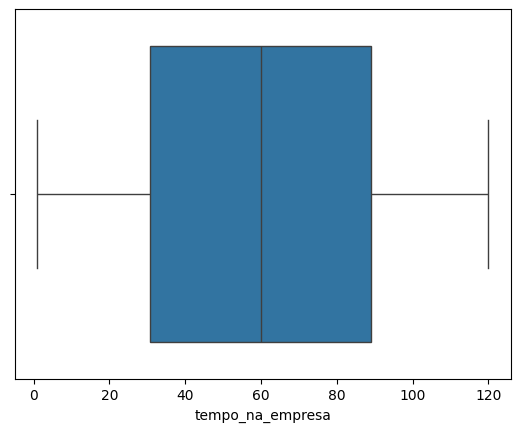

In [10]:
# boxplot para verificar outliers
sns.boxplot(data=df_sal_eda, x='tempo_na_empresa')

<Axes: xlabel='nivel_na_empresa'>

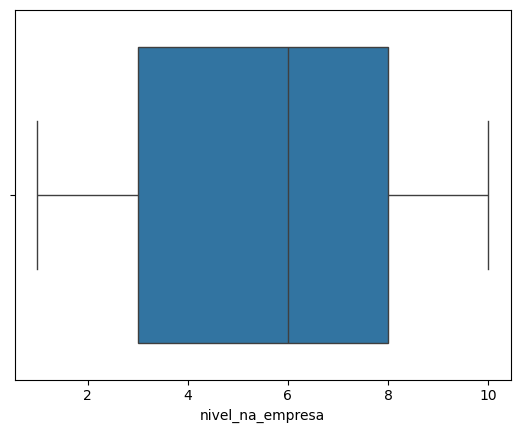

In [11]:
sns.boxplot(data=df_sal_eda, x='nivel_na_empresa')

<Axes: xlabel='salario_em_reais'>

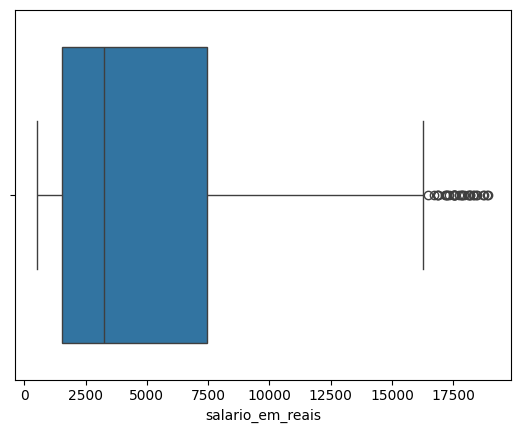

In [12]:
sns.boxplot(df_sal_eda, x='salario_em_reais')

## Relação entre variáveis

<Axes: xlabel='tempo_na_empresa', ylabel='salario_em_reais'>

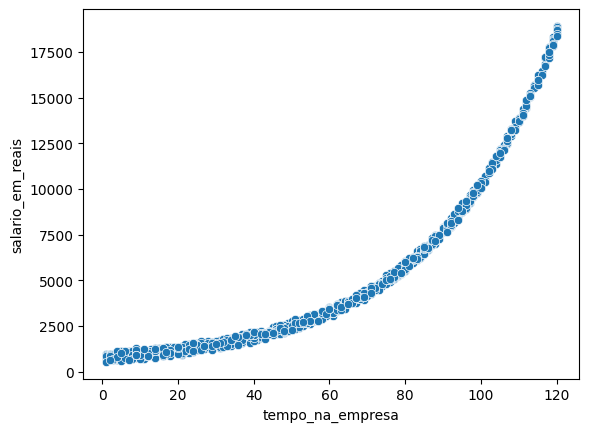

In [13]:
# Cruzamento das váriaveis independentes com a variável depentente (salario)
sns.scatterplot(data=df_sal_eda, x='tempo_na_empresa', y='salario_em_reais')

<Axes: xlabel='nivel_na_empresa', ylabel='salario_em_reais'>

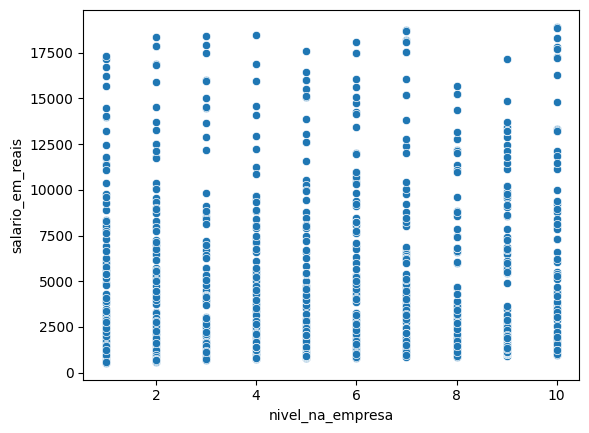

In [14]:
sns.scatterplot(data=df_sal_eda, x='nivel_na_empresa', y='salario_em_reais')

<Axes: xlabel='tempo_na_empresa', ylabel='nivel_na_empresa'>

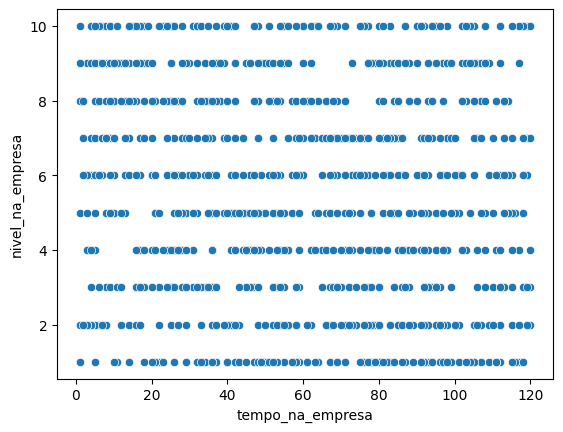

In [15]:
sns.scatterplot(data=df_sal_eda, x='tempo_na_empresa', y='nivel_na_empresa')

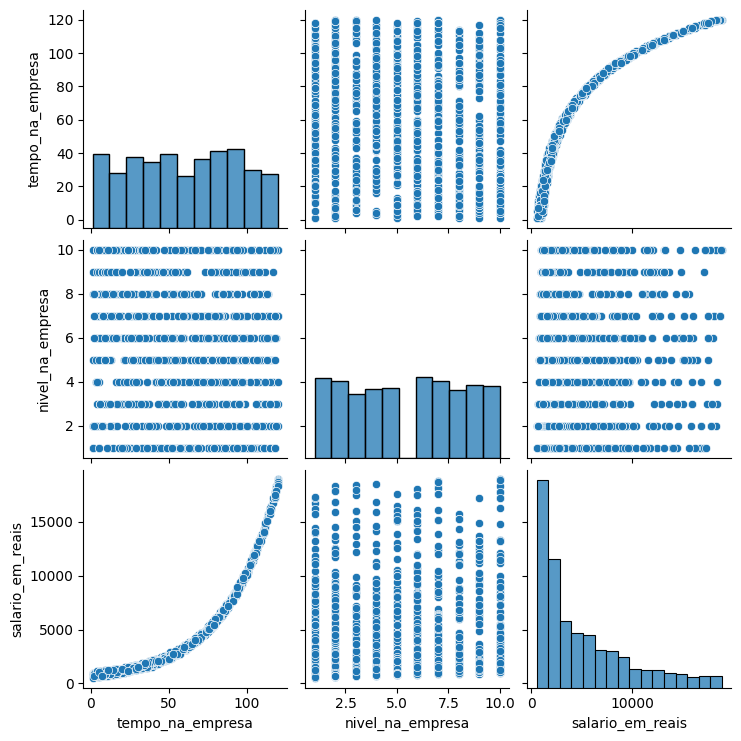

In [16]:
sns.pairplot(data=df_sal_eda)

## Correlação de variáveis

<Axes: >

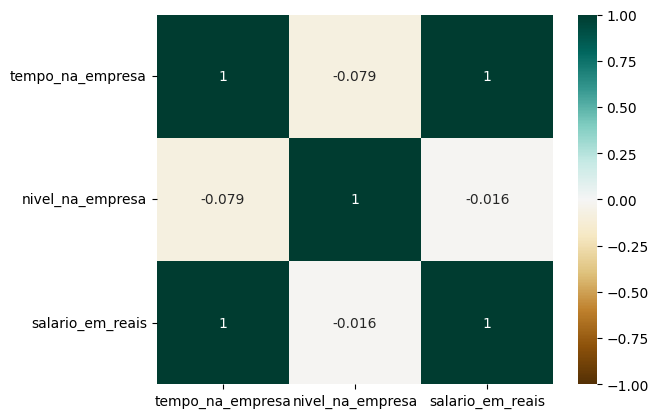

In [17]:
sns.heatmap(df_sal_eda.corr(method='spearman'), annot=True, vmin=-1, vmax=1 ,cmap="BrBG")

<Axes: >

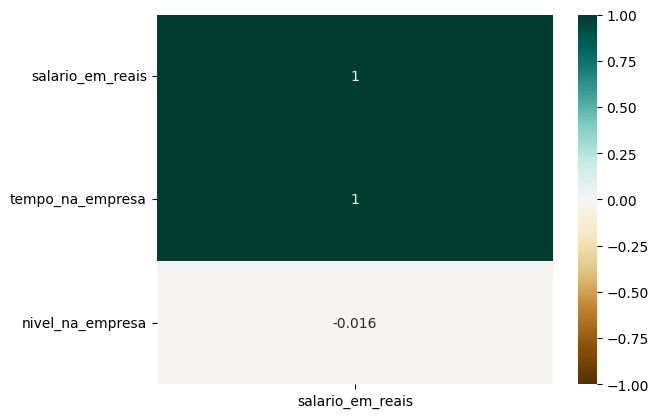

In [18]:
sns.heatmap(df_sal_eda.corr('spearman')[['salario_em_reais']].sort_values(by=['salario_em_reais'], ascending=False), annot=True, vmin=-1, vmax=1, cmap='BrBG')

## Bucketing

In [19]:
# Bucketing de tempo_na_empresa
bins_tempo_empresa = [0,10,20,30,40,50,60,70,80,90,100,110,120,130]
labels_tempo_empresa = ['0-9','10-19','20-29','30-39','40-49','50-59','60-69','70-79','80-89','90-99','100-109','110-119','120-129']

df_sal_bkt['faixa_tempo'] = pd.cut(x=df_sal_bkt.tempo_na_empresa, bins=bins_tempo_empresa, labels=labels_tempo_empresa, include_lowest=True)

In [20]:
df_sal_bkt[df_sal_bkt.tempo_na_empresa == 120].head(20)

,tempo_na_empresa,nivel_na_empresa,salario_em_reais,faixa_tempo
54,120,3,18427.06,110-119
224,120,10,18923.23,110-119
424,120,10,18855.80,110-119
542,120,7,18757.64,110-119
643,120,7,18701.75,110-119
902,120,4,18465.36,110-119
934,120,2,18357.56,110-119


<Axes: xlabel='faixa_tempo', ylabel='salario_em_reais'>

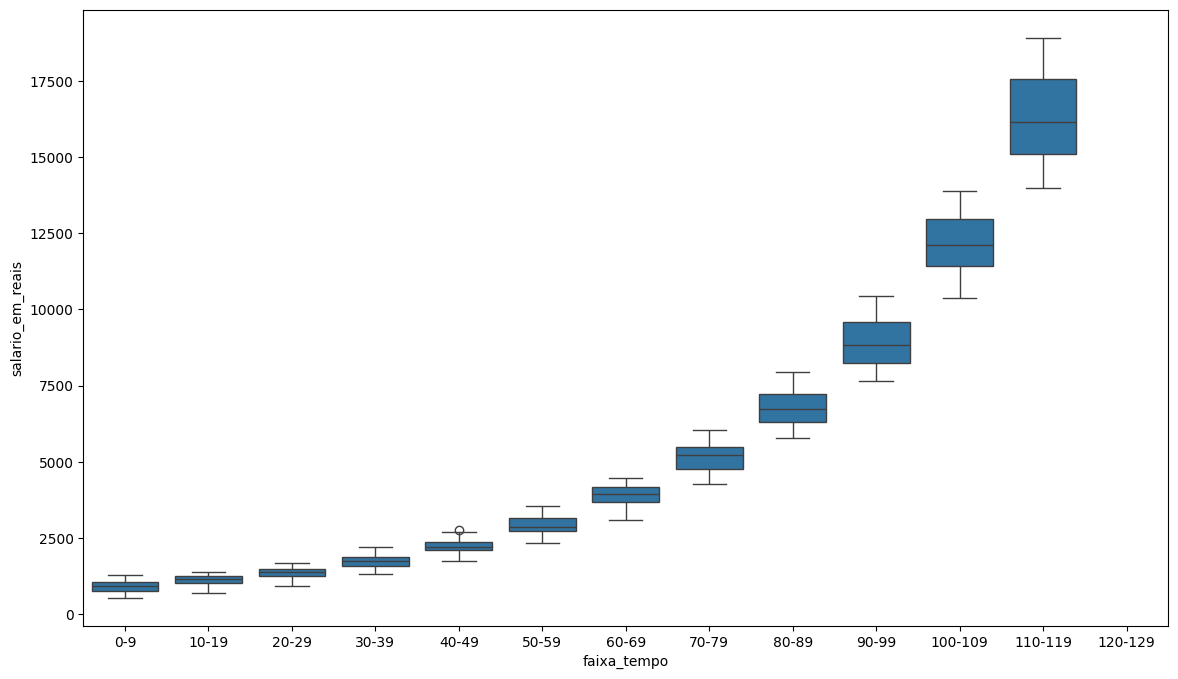

In [21]:
plt.figure(figsize=(14,8))
sns.boxplot(df_sal_bkt, x='faixa_tempo', y='salario_em_reais')

# Treinar Modelo

## Modelo Linear

In [28]:
# importar bibliotecas
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_squared_error, root_mean_squared_error
import numpy as np

In [29]:
# criar o dataset de treino e test
X = df_sal.drop(columns='salario_em_reais')
y = df_sal['salario_em_reais']

In [30]:
# Split usando KFold com 5 pastas/splits
kf = KFold(n_splits=5, shuffle=True, random_state=51)

In [31]:
kf.split(X)

<generator object _BaseKFold.split at 0x7ff4b3a7ad40>

In [32]:
# Bloco para Treinamento do modelo
## Pipeline
## Padronizar variaveis numericas - tempo_na_empresa e nivel_na_empresa

## Nomes das colunas
colunas_num = ['tempo_na_empresa', 'nivel_na_empresa']

## Transformer para colunas numericas
transformer_num = Pipeline(
    steps=[
        ('scaler', StandardScaler())
    ]
)

## ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', transformer_num, colunas_num)
    ]
)

## Pipeline principal = pre-processamento + treinamento
model_regr = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('regressor', LinearRegression())
    ]
)

# Armazenar RMSE Treino e Teste - validar overfitting(erro muito maior no teste que no treinamento)
rmse_scores_fold_train = []
rmse_scores_fold_test = []

# Armazenar R2 Score de Testes
r2score_fold_test = []

# Armazenar Resíduos
residuos = []

# Armazenar as Predições
y_pred_total = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Treinar o modelo, por iteração
    model_regr.fit(X_train, y_train)

    # Predições nos conjuntos de treinamento e teste - predict com X_train para analisar RMSE e identificar underfitting (caso erro seja grande)
    # ou overfitting (caso erro de test seja muito maior que o de train)
    y_train_pred = model_regr.predict(X_train)
    y_test_pred = model_regr.predict(X_test)

    # Calcular o RMSE, R2 Score e Residuos para os conjuntos de treinamento e teste
    rmse_train = root_mean_squared_error(y_train, y_train_pred)
    rmse_test = root_mean_squared_error(y_test, y_test_pred)

    # Calcular o R2 Score e Residuos para os conjuntos de teste
    r2score_test = r2_score(y_test, y_test_pred)
    residuos_test = np.array(y_test - y_test_pred)

    # Armazenar métricas nas variaveis de lista
    rmse_scores_fold_train.append(rmse_train)
    rmse_scores_fold_test.append(rmse_test)
    r2score_fold_test.append(r2score_test)
    residuos.append(residuos_test)
    y_pred_total.append(y_test_pred)

### Validar Modelo Linear

In [34]:
# Tirar média dos resultados
rmse_train_final = np.mean(rmse_scores_fold_train)
rmse_test_final = np.mean(rmse_scores_fold_test)
r2score_test_final = np.mean(r2score_fold_test)
percentual_rmse_final = (rmse_test_final - rmse_train_final) / rmse_train_final *100
residuos = np.array(residuos).reshape(-1)
y_pred_total = np.array(y_pred_total).reshape(-1)

### Análise de Métricas do Modelo Linear

In [36]:
print(f'RMSE Treino: {rmse_train_final}')
print(f'RMSE Teste: {rmse_test_final}')
print(f'Taxa Dif RMSE Treino e Teste: {percentual_rmse_final}%')
print(f'R2 Score Teste: {r2score_test_final}')

RMSE Treino: 1882.8318426651392
RMSE Teste: 1886.4504221336076
Taxa Dif RMSE Treino e Teste: 0.19218813844503052%
R2 Score Teste: 0.8261178870584761


Diferença entre erros de teste e treino são pequenas, o que não indica um overfitting. Porém, o erro está muito alto, podendo indicar underfitting.<br>
Além disso, o R2 Score não é dos melhores, modelos mais ajustados ficam mais próximos de 1.

### Análise de Resíduos do Modelo Linear

In [37]:
# Transformar os resíduos na escala padrão
# (X - media)/desvio_padrao
from scipy.stats import zscore
residuos_std = zscore(residuos)

In [38]:
residuos_std

array([ 5.95616525e-01, -7.24916727e-01, -6.46846433e-01,  8.64095533e-01,
       -5.33806156e-02, -7.61704833e-01,  6.80947606e-01,  1.45661295e+00,
        3.15407488e-01, -5.85616590e-01,  1.29483240e-01,  8.62850152e-01,
       -8.81408422e-01, -2.57676835e-01, -3.98447700e-01,  4.84215194e-01,
       -9.30147928e-01, -1.98427398e-01,  2.09007896e-01, -9.04965560e-01,
       -6.81287606e-02, -8.34446292e-01, -3.95656924e-01,  1.85180868e-01,
       -8.59767063e-01, -1.16014546e+00, -9.89137623e-01,  1.98282340e+00,
       -7.09136535e-01, -5.86755306e-01,  2.97904569e+00,  3.41834809e-01,
       -1.07716414e+00,  1.30248304e+00, -5.99662310e-01, -4.35883427e-01,
       -5.78726106e-01, -1.02611646e+00,  3.62850210e-01,  1.01353539e+00,
       -3.51902591e-01,  9.50243614e-01,  1.10020428e+00,  3.93453210e-01,
       -8.28856918e-02, -2.86114598e-01, -1.14814701e+00, -7.64435745e-01,
       -2.96268121e-01, -9.37004031e-01, -5.80106334e-01,  4.60575328e-02,
       -2.64983022e-01,  

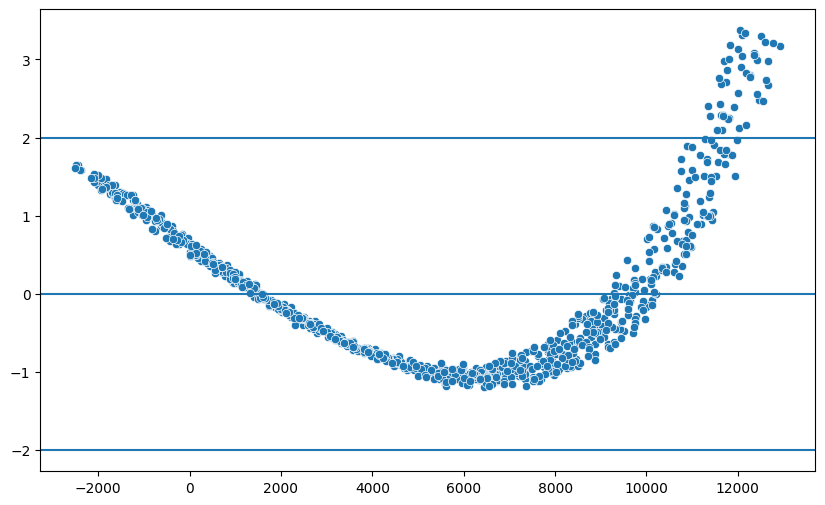

In [39]:
# Linearidade dos resíduos: Valores entre -2 e 2 na escala padrão
# Verificar homocedasticidade: valores em torno da reta sem nenhuma tendencia ou formato
plt.figure(figsize=(10,6))
sns.scatterplot(x=y_pred_total, y=residuos_std)
plt.axhline(y=0)
plt.axhline(y=2)
plt.axhline(y=-2)

Os valores formam um padrão, portanto, não há linearidade dos dados, apresentando heterocedesticidade. Além disso, alguns valores estão acima do limite superior(2).

Text(0, 0.5, 'Residuos na escala padrão')

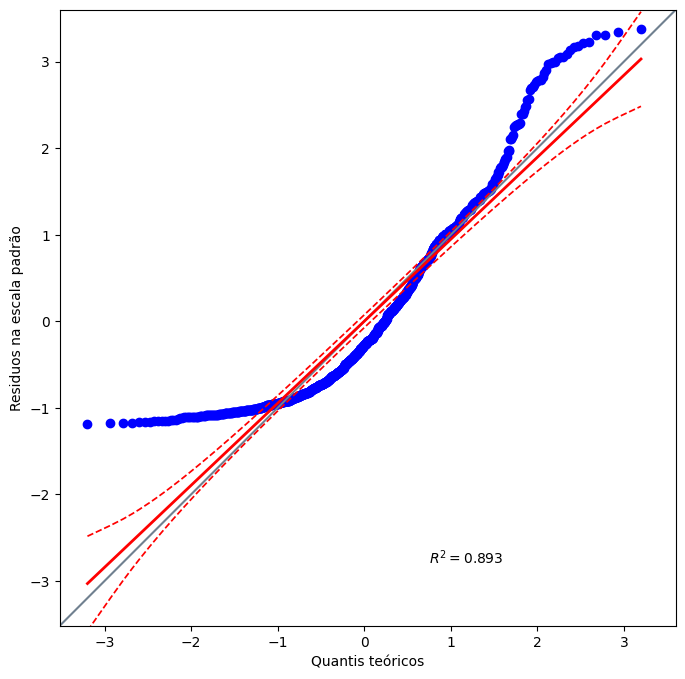

In [40]:
# Checar se residuos apresentam normalidade
# QQ Plot
import pingouin as pg
plt.figure(figsize=(14,8))
pg.qqplot(residuos_std, dist='norm', confidence=0.95)
plt.xlabel('Quantis teóricos')
plt.ylabel('Residuos na escala padrão')


### Testes estatísticos

In [41]:
# Teste de normalidade - Shapiro-Wilk
from scipy.stats import shapiro, kstest
from statsmodels.stats.diagnostic import lilliefors

stat_shapiro, p_shapiro = shapiro(residuos)
print(f'Estatística Teste: {stat_shapiro}')
print(f'P-value: {p_shapiro}')

Estatística Teste: 0.891969217965228
P-value: 7.013497918013644e-26


P-value muito abaixo de 0,05 - resíduos não seguem uma distribuição normal

In [42]:
# Teste de normalidade - Kolmogorov-Smirnov
stat_ks, p_ks = kstest(residuos, 'norm')
print(f'Estatística Teste: {stat_ks}')
print(f'P-value: {p_ks}')

Estatística Teste: 0.5939999999999955
P-value: 0.0


P-value muito abaixo de 0,05 - resíduos não seguem uma distribuição normal

In [43]:
# Teste de normalidade - Lilliefors
stat_ll, p_ll = lilliefors(residuos, dist='norm', pvalmethod='table')
print(f'Estatística Teste: {stat_ll}')
print(f'P-value: {p_ll}')

Estatística Teste: 0.11825983774680088
P-value: 0.0009999999999998899


P-value muito abaixo de 0,05 - resíduos não seguem uma distribuição normal

## Modelo Polinomial

### Exemplo

In [45]:
# Exemplo de criação de features polinomiais

feat_poly = PolynomialFeatures(degree=3, include_bias=False)
X_poly = feat_poly.fit_transform(X)

#verificar features utilizadas
feat_poly.feature_names_in_

array(['tempo_na_empresa', 'nivel_na_empresa'], dtype=object)

In [47]:
feat_poly.get_feature_names_out()

array(['tempo_na_empresa', 'nivel_na_empresa', 'tempo_na_empresa^2',
       'tempo_na_empresa nivel_na_empresa', 'nivel_na_empresa^2',
       'tempo_na_empresa^3', 'tempo_na_empresa^2 nivel_na_empresa',
       'tempo_na_empresa nivel_na_empresa^2', 'nivel_na_empresa^3'],
      dtype=object)

### Treinar

In [48]:
# Bloco para Treinamento do modelo

poly_degrees = [1,2,3,4,5,6,7,8,9,10]

rmse_train_values = []
rmse_test_values = []
percentual_rmse_values = []
r2score_test_values = []

# Split usando KFold com 5 pastas/splits
kf = KFold(n_splits=5, shuffle=True, random_state=51)

for degree in poly_degrees:
    ## Pipeline
    ## Padronizar variaveis numericas - tempo_na_empresa e nivel_na_empresa

    ## Nomes das colunas
    colunas_num = ['tempo_na_empresa', 'nivel_na_empresa']

    ## Transformer para colunas numericas
    transformer_num = Pipeline(
        steps=[
            ('scaler', StandardScaler())
        ]
    )

    ## ColumnTransformer
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', transformer_num, colunas_num)
        ]
    )

    # Criar features polinomiais
    poly_feat = PolynomialFeatures(degree=degree, include_bias=False)

    ## Pipeline principal = pre-processamento + treinamento
    model_poly = Pipeline(
        steps=[
            ('preprocessor', preprocessor),
            ('poly_features', poly_feat),
            ('regressor', LinearRegression())
        ]
    )

    # Armazenar RMSE Treino e Teste - validar overfitting(erro muito maior no teste que no treinamento)
    rmse_scores_fold_train = []
    rmse_scores_fold_test = []

    # Armazenar R2 Score de Testes
    r2score_fold_test = []

    # Armazenar Resíduos
    residuos = []

    # Armazenar as Predições
    y_pred_total = []

    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Treinar o modelo, por iteração
        model_poly.fit(X_train, y_train)

        # Predições nos conjuntos de treinamento e teste - predict com X_train para analisar RMSE e identificar underfitting (caso erro seja grande)
        # ou overfitting (caso erro de test seja muito maior que o de train)
        y_train_pred = model_poly.predict(X_train)
        y_test_pred = model_poly.predict(X_test)

        # Calcular o RMSE, R2 Score e Residuos para os conjuntos de treinamento e teste
        rmse_train = root_mean_squared_error(y_train, y_train_pred)
        rmse_test = root_mean_squared_error(y_test, y_test_pred)

        # Calcular o R2 Score e Residuos para os conjuntos de teste
        r2score_test = r2_score(y_test, y_test_pred)
        residuos_test = np.array(y_test - y_test_pred)

        # Armazenar métricas nas variaveis de lista
        rmse_scores_fold_train.append(rmse_train)
        rmse_scores_fold_test.append(rmse_test)
        r2score_fold_test.append(r2score_test)
        residuos.append(residuos_test)
        y_pred_total.append(y_test_pred)
    
    # Tirar média dos resultados
    rmse_train_final = np.mean(rmse_scores_fold_train)
    rmse_test_final = np.mean(rmse_scores_fold_test)
    r2score_test_final = np.mean(r2score_fold_test)
    percentual_rmse_final = (rmse_test_final - rmse_train_final) / rmse_train_final *100
    residuos = np.array(residuos).reshape(-1)
    y_pred_total = np.array(y_pred_total).reshape(-1)

    rmse_train_values.append(rmse_train_final)
    rmse_test_values.append(rmse_test_final)
    r2score_test_values.append(r2score_test_final)
    percentual_rmse_values.append(percentual_rmse_final)


### Análise de Métricas do Modelo Poli

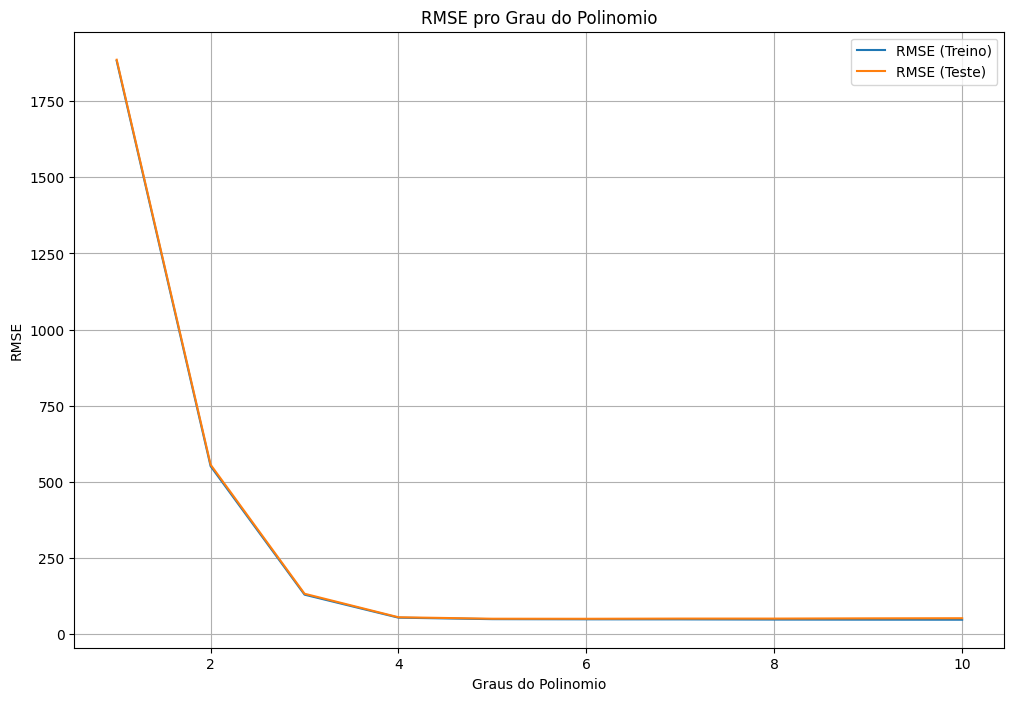

In [51]:
# Plotar gráfico para comparar RMSE por grau de polinomio
plt.figure(figsize=(12,8))
plt.plot(poly_degrees, rmse_train_values, label='RMSE (Treino)')
plt.plot(poly_degrees, rmse_test_values, label='RMSE (Teste)')
plt.xlabel('Graus do Polinomio')
plt.ylabel('RMSE')
plt.title('RMSE pro Grau do Polinomio')
plt.legend()
plt.grid(True)
plt.show()

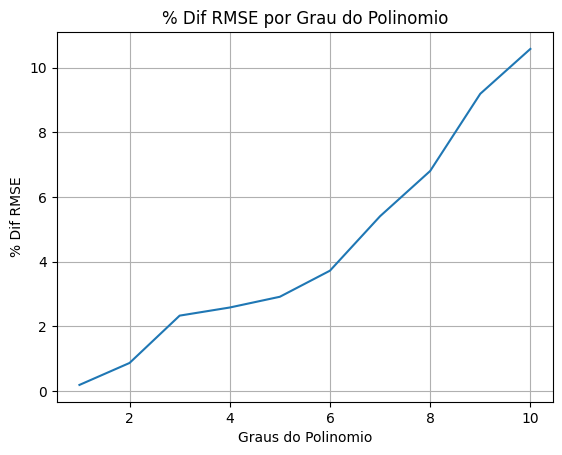

In [53]:
# Plotar gráfico para comparar % de diferença de RMSE (treino e teste)
#plt.figure(figsize=(12,8))
plt.plot(poly_degrees, percentual_rmse_values, label='% Dif RMSE Treino e Teste')
#plt.plot(poly_degrees, rmse_test_values, label='RMSE (Teste)')
plt.xlabel('Graus do Polinomio')
plt.ylabel('% Dif RMSE')
plt.title('% Dif RMSE por Grau do Polinomio')
#plt.legend()
plt.grid(True)
plt.show()

### Treinar Modelo com Grau definido
Após analise de erros acima, definimos que o melhor grau pra esse modelo polinomial é 4, agora vamos treinar o modelo com base nesse grau e fazer as analises

In [55]:
# Bloco para Treinamento do modelo

poly_degrees = [4]

rmse_train_values = []
rmse_test_values = []
percentual_rmse_values = []
r2score_test_values = []

# Split usando KFold com 5 pastas/splits
kf = KFold(n_splits=5, shuffle=True, random_state=51)

for degree in poly_degrees:
    ## Pipeline
    ## Padronizar variaveis numericas - tempo_na_empresa e nivel_na_empresa

    ## Nomes das colunas
    colunas_num = ['tempo_na_empresa', 'nivel_na_empresa']

    ## Transformer para colunas numericas
    transformer_num = Pipeline(
        steps=[
            ('scaler', StandardScaler())
        ]
    )

    ## ColumnTransformer
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', transformer_num, colunas_num)
        ]
    )

    # Criar features polinomiais
    poly_feat = PolynomialFeatures(degree=degree, include_bias=False)

    ## Pipeline principal = pre-processamento + treinamento
    model_poly = Pipeline(
        steps=[
            ('preprocessor', preprocessor),
            ('poly_features', poly_feat),
            ('regressor', LinearRegression())
        ]
    )

    # Armazenar RMSE Treino e Teste - validar overfitting(erro muito maior no teste que no treinamento)
    rmse_scores_fold_train = []
    rmse_scores_fold_test = []

    # Armazenar R2 Score de Testes
    r2score_fold_test = []

    # Armazenar Resíduos
    residuos = []

    # Armazenar as Predições
    y_pred_total = []

    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Treinar o modelo, por iteração
        model_poly.fit(X_train, y_train)

        # Predições nos conjuntos de treinamento e teste - predict com X_train para analisar RMSE e identificar underfitting (caso erro seja grande)
        # ou overfitting (caso erro de test seja muito maior que o de train)
        y_train_pred = model_poly.predict(X_train)
        y_test_pred = model_poly.predict(X_test)

        # Calcular o RMSE, R2 Score e Residuos para os conjuntos de treinamento e teste
        rmse_train = root_mean_squared_error(y_train, y_train_pred)
        rmse_test = root_mean_squared_error(y_test, y_test_pred)

        # Calcular o R2 Score e Residuos para os conjuntos de teste
        r2score_test = r2_score(y_test, y_test_pred)
        residuos_test = np.array(y_test - y_test_pred)

        # Armazenar métricas nas variaveis de lista
        rmse_scores_fold_train.append(rmse_train)
        rmse_scores_fold_test.append(rmse_test)
        r2score_fold_test.append(r2score_test)
        residuos.append(residuos_test)
        y_pred_total.append(y_test_pred)
    
    # Tirar média dos resultados
    rmse_train_final = np.mean(rmse_scores_fold_train)
    rmse_test_final = np.mean(rmse_scores_fold_test)
    r2score_test_final = np.mean(r2score_fold_test)
    percentual_rmse_final = (rmse_test_final - rmse_train_final) / rmse_train_final *100
    residuos = np.array(residuos).reshape(-1)
    y_pred_total = np.array(y_pred_total).reshape(-1)

    rmse_train_values.append(rmse_train_final)
    rmse_test_values.append(rmse_test_final)
    r2score_test_values.append(r2score_test_final)
    percentual_rmse_values.append(percentual_rmse_final)

### Analise de Métricas do Modelo Poli - Grau Definido

In [56]:
print(f'RMSE Treino: {rmse_train_final}')
print(f'RMSE Teste: {rmse_test_final}')
print(f'Taxa Dif RMSE Treino e Teste: {percentual_rmse_final}%')
print(f'R2 Score Teste: {r2score_test_final}')

RMSE Treino: 53.32698559565158
RMSE Teste: 54.705043527963426
Taxa Dif RMSE Treino e Teste: 2.584166190755432%
R2 Score Teste: 0.9998524123039415


### Análise de Resíduos do Modelo Poli

In [57]:
# Transformar os resíduos na escala padrão
# (X - media)/desvio_padrao
from scipy.stats import zscore
residuos_std = zscore(residuos)

In [58]:
residuos_std

array([-1.76658136e+00,  6.13919903e-01,  4.57932407e-01,  3.77621549e-01,
       -1.77161928e+00, -2.13372467e+00, -2.88053498e-01, -1.15486201e+00,
        1.26076256e+00, -1.38932876e+00, -1.63659072e-01,  9.49916278e-01,
        1.10428797e+00, -1.69277005e+00, -1.55137077e+00,  6.50212053e-01,
        2.39650670e+00, -5.48674224e-01, -4.71815369e-01, -4.93214903e-01,
       -9.93275437e-01,  4.37069649e-01, -2.35827600e-01,  4.45720599e-01,
        1.40041227e-01, -2.28929917e+00,  3.58302195e-01,  6.15006495e-01,
        1.42514234e+00, -1.40851950e+00,  1.28177409e+00, -1.47234024e-01,
       -3.60957871e-01, -9.30096879e-02,  3.81531150e-01,  1.24092430e-01,
       -3.96949408e-01,  8.01984667e-01, -1.66729377e+00, -3.61968959e-01,
        1.09965292e+00,  4.53175371e-01, -3.37795185e-01, -6.12203426e-01,
        1.86697658e-01, -1.00712904e+00,  3.94042102e-01,  1.06437582e+00,
       -2.25733503e+00,  1.51520710e+00, -4.44535131e-01,  2.39420946e+00,
       -3.94795656e-01, -

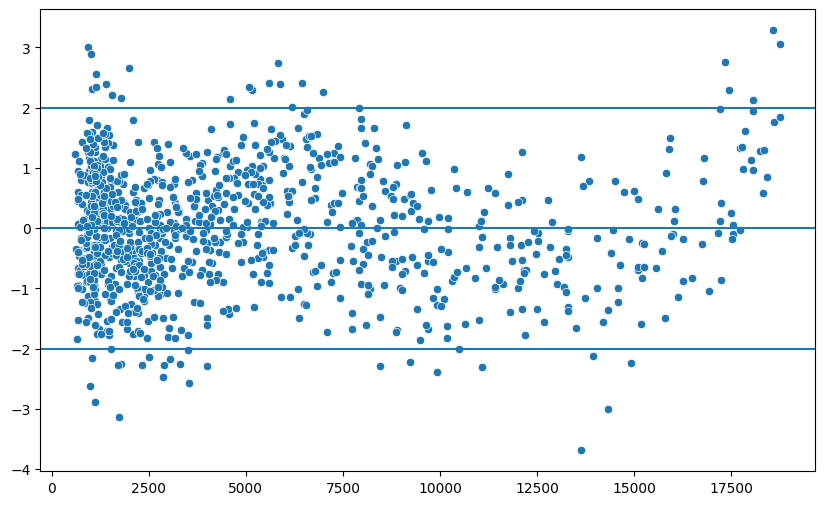

In [59]:
# Linearidade dos resíduos: Valores entre -2 e 2 na escala padrão
# Verificar homocedasticidade: valores em torno da reta sem nenhuma tendencia ou formato
plt.figure(figsize=(10,6))
sns.scatterplot(x=y_pred_total, y=residuos_std)
plt.axhline(y=0)
plt.axhline(y=2)
plt.axhline(y=-2)

Os valores formam um padrão, portanto, não há linearidade dos dados, apresentando heterocedesticidade. Além disso, alguns valores estão acima do limite superior(2).

Text(0, 0.5, 'Residuos na escala padrão')

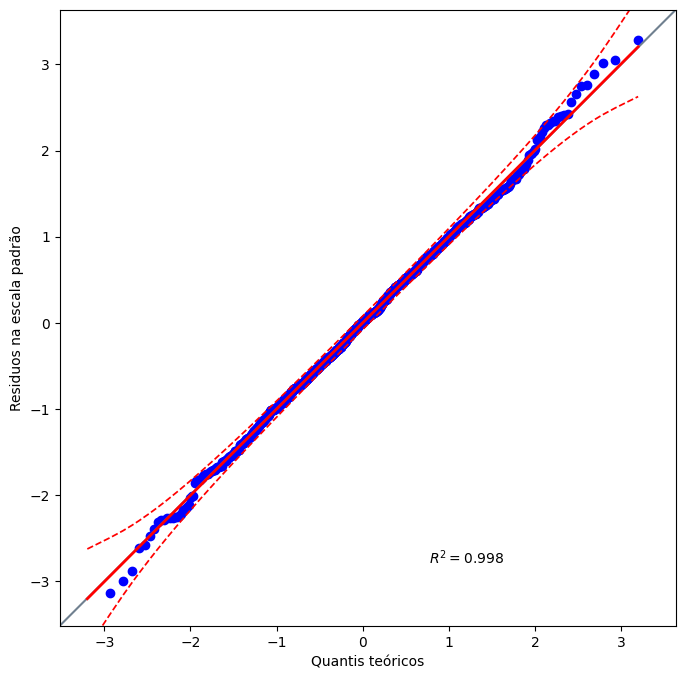

In [60]:
# Checar se residuos apresentam normalidade
# QQ Plot
import pingouin as pg
plt.figure(figsize=(14,8))
pg.qqplot(residuos_std, dist='norm', confidence=0.95)
plt.xlabel('Quantis teóricos')
plt.ylabel('Residuos na escala padrão')


### Testes estatísticos

In [61]:
# Teste de normalidade - Shapiro-Wilk
from scipy.stats import shapiro, kstest
from statsmodels.stats.diagnostic import lilliefors

stat_shapiro, p_shapiro = shapiro(residuos)
print(f'Estatística Teste: {stat_shapiro}')
print(f'P-value: {p_shapiro}')

Estatística Teste: 0.9986951372205314
P-value: 0.6852797159654203


P-value acima de 0,05 - resíduos seguem uma distribuição normal

In [63]:
# Teste de normalidade - Kolmogorov-Smirnov
stat_ks, p_ks = kstest(residuos, 'norm')
print(f'Estatística Teste: {stat_ks}')
print(f'P-value: {p_ks}')

Estatística Teste: 0.4823744649952717
P-value: 1.220246010750369e-214


P-value muito abaixo de 0,05 - resíduos não seguem uma distribuição normal

In [64]:
# Teste de normalidade - Lilliefors
stat_ll, p_ll = lilliefors(residuos, dist='norm', pvalmethod='table')
print(f'Estatística Teste: {stat_ll}')
print(f'P-value: {p_ll}')

Estatística Teste: 0.01363734689497198
P-value: 0.9566270022047744


P-value muito acima de 0,05 - resíduos seguem uma distribuição normal

### Predição


In [74]:
input_features = {
    'tempo_na_empresa': 80,
    'nivel_na_empresa': 5
}

pred_df = pd.DataFrame(input_features, index=[1])

In [75]:
model_poly.predict(pred_df)

array([5747.79896506])

In [76]:
import joblib

# Salvar o modelo
joblib.dump(model_poly, './modelo_salario.pkl')

['./modelo_salario.pkl']